In [16]:
import os
import sys
os.path.abspath(sys.argv[0])

'C:\\Users\\laris\\anaconda3\\envs\\gpu\\lib\\site-packages\\ipykernel_launcher.py'

In [52]:
import numpy as np

from convolution_neural_network import ConvolutionNeuralNetwork
from convolution_layer import ConvolutionLayer
from pooling_layer import PoolingLayer
from dense_layer import DenseLayer
from flatten_layer import FlattenLayer
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split


In [82]:
model = ConvolutionNeuralNetwork()

model.add_layer(ConvolutionLayer(filters_count=6, kernel_size=(5, 5), activation='relu', input_shape=(1, 28, 28)))
model.add_layer(PoolingLayer(size=2))
model.add_layer(ConvolutionLayer(filters_count=16, kernel_size=(5, 5), activation='relu'))
model.add_layer(PoolingLayer(size=2))
model.add_layer(FlattenLayer())
model.add_layer(DenseLayer(neurons_count=120, activation='relu', input_shape=5))
model.add_layer(DenseLayer(neurons_count=84, activation='relu'))
model.add_layer(DenseLayer(neurons_count=10))
model.init()

In [75]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = np.eye(10)[y_train][:, np.newaxis]
y_train = np.transpose(y_train, (0, 2, 1))
y_test = np.eye(10)[y_test][:, np.newaxis]
y_test = np.transpose(y_test, (0, 2, 1))

#X_train = X_train[:100]
#y_train = y_train[:100]
import random

In [183]:
    while True:
        error = 0
        for i in range(len(X_train)):
            k = random.randint(0, len(X_train) - 1)
            error += model.fit(np.array([X_train[k]]), y_train[k])
            if i % 1 == 0:
                model.update_weight(0.000000001)
            if i % 100 == 99:
                print(error / i)
        error /= len(X_train)

        print(error)
        if error < 0.1:
            break

0.06060606060606061
0.11055276381909548
0.11371237458193979
0.12531328320802004
0.1282565130260521
0.1302170283806344
0.13447782546494993
0.15018773466833543
0.14905450500556172
0.14414414414414414


KeyboardInterrupt: 

In [184]:
model.predict(np.array([X_test[4]]))

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

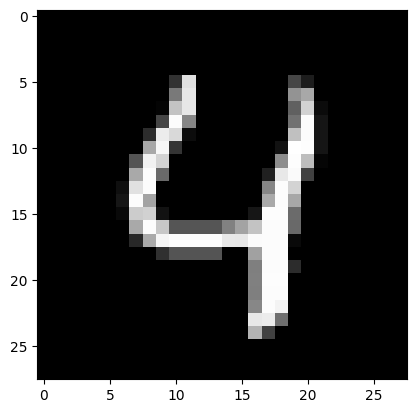

In [151]:
pyplot.imshow(X_test[4], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [51]:
import py_compile
py_compile.compile("C:\\Users\\laris\\anaconda3\\envs\\gpu\\lib\\site-packages\\convolution_neural_network.py")

'C:\\Users\\laris\\anaconda3\\envs\\gpu\\lib\\site-packages\\__pycache__\\convolution_neural_network.cpython-39.pyc'

In [87]:
y_test.shape

(10000, 10, 1)

In [185]:
y_predicted = np.zeros((10000, 10, 1))

In [186]:
for i in range(10000):
    y_predicted[i] = model.predict(np.array([X_test[i]]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [187]:
err = 0
for i in range(10000):
    err += (np.sum(np.abs(y_predicted[i]-y_test[i])) > 0.8)

In [188]:
err

820

In [190]:
1 - err / 10000

0.918

8
2


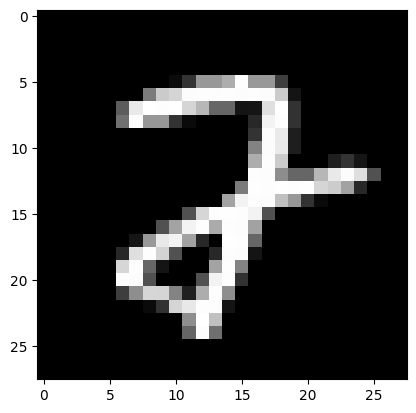

In [295]:
j=583
print(np.where(y_predicted[j] > 0.8)[0][0])
print(np.where(y_test[j] > 0.8)[0][0])
pyplot.imshow(X_test[j], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [271]:
from metrics_4 import *

In [272]:
print_metrics(y_predicted, y_test)

0: precision: 0.9522842639593908 recall: 0.9571428571428572 f1: 0.95470737913486
1: precision: 0.9588441330998249 recall: 0.9647577092511013 f1: 0.9617918313570487
2: precision: 0.9469548133595285 recall: 0.9341085271317829 f1: 0.9404878048780487
3: precision: 0.8753623188405797 recall: 0.897029702970297 f1: 0.8860635696821516
4: precision: 0.9212435233160622 recall: 0.905295315682281 f1: 0.9131997945557268
5: precision: 0.9004576659038902 recall: 0.8822869955156951 f1: 0.8912797281993206
6: precision: 0.9327817993795243 recall: 0.941544885177453 f1: 0.9371428571428572
7: precision: 0.935678391959799 recall: 0.9056420233463035 f1: 0.9204152249134948
8: precision: 0.8657314629258517 recall: 0.8870636550308009 f1: 0.8762677484787018
9: precision: 0.8854064642507345 recall: 0.8959365708622399 f1: 0.89064039408867
macro precision: 0.9174744836995188
macro recall: 0.9170808242110813
micro precision: 0.918
micro recall: 0.918


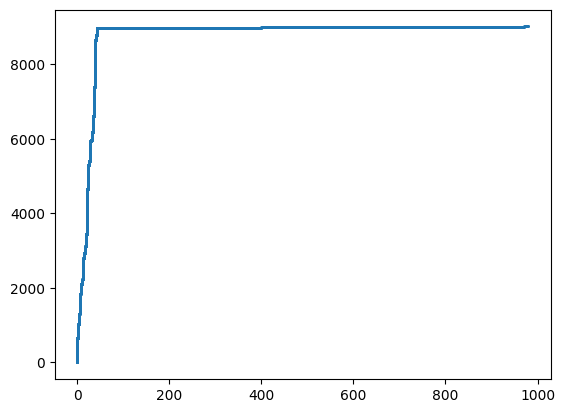

In [259]:
roc_curve(y_predicted, y_test, 0)

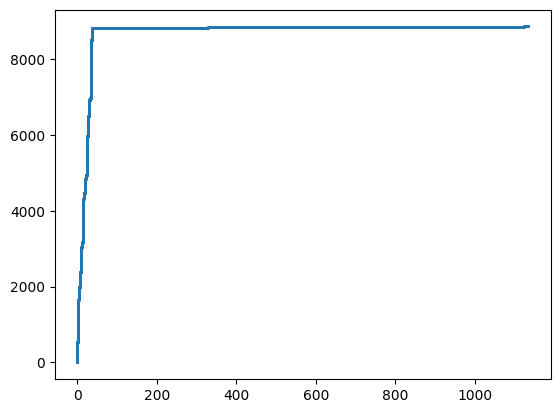

In [260]:
roc_curve(y_predicted, y_test, 1)

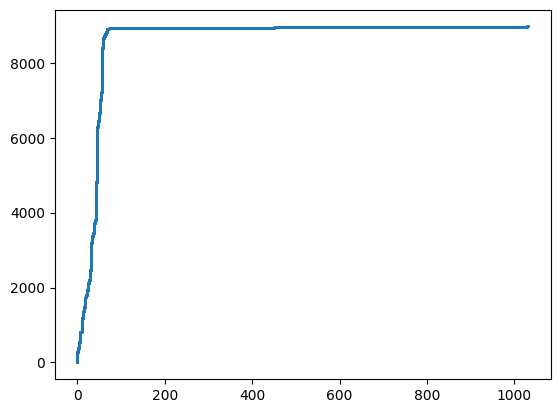

In [261]:
roc_curve(y_predicted, y_test, 2)

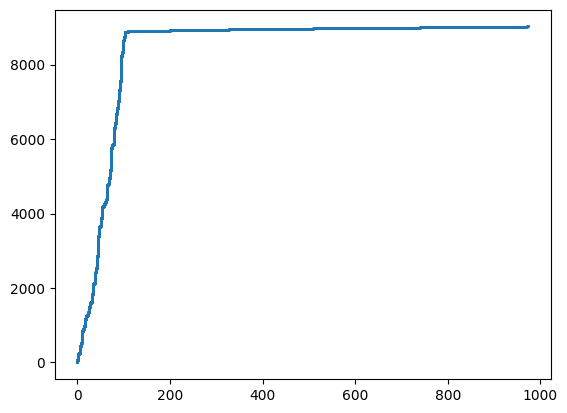

In [262]:
roc_curve(y_predicted, y_test, 8)